In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/train.csv")

Starting with Data Cleaning,

In [ ]:
data.head()

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
0,2021-01-26 02:21:35,556753,2021-01-26 00:00:00,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN,NaN,NaN,NaN
1,2021-01-26 02:33:16,556754,2021-01-26 00:00:00,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN,NaN,NaN,3.266667,NaN
2,2021-01-26 02:39:49,556755,2021-01-26 00:00:00,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,NaN,NaN,NaN,9.816667,NaN
3,2021-01-26 02:47:53,556756,2021-01-26 00:00:00,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,NaN,NaN,NaN,17.533333,NaN
4,2021-01-26 03:06:30,556757,2021-01-26 00:00:00,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,NaN,NaN,NaN,1.350000,NaN


In [ ]:
data.describe()

,order_id,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassigned_order,session_time
count,450000.000000,450000.000000,450000.000000,450000.000000,433052.000000,432659.000000,450000.000000,432659.000000,449947.000000,13753.0,446325.000000
mean,369143.080767,7763.244016,1.229889,2.968873,104.620909,103.950448,0.011596,0.764165,853.640664,1.0,220.474779
std,131146.906408,5592.880135,0.846183,1.884124,90.135492,89.639646,0.107057,1.066473,1502.976162,0.0,176.713853
min,118350.000000,0.000000,0.000134,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,257342.750000,2805.000000,0.539575,1.470000,36.000000,36.000000,0.000000,0.000000,165.000000,1.0,84.100000
50%,369842.500000,6754.000000,1.138700,2.670000,81.000000,81.000000,0.000000,0.000000,396.000000,1.0,175.550000
75%,482342.250000,11965.000000,1.853000,4.220000,147.000000,146.000000,0.000000,1.000000,948.000000,1.0,316.766667
max,594842.000000,21566.000000,42.038100,22.410000,567.000000,562.000000,1.000000,9.000000,30469.000000,1.0,1298.966667


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_time            450000 non-null  object 
 1   order_id              450000 non-null  int64  
 2   order_date            450000 non-null  object 
 3   allot_time            450000 non-null  object 
 4   accept_time           449843 non-null  object 
 5   pickup_time           447579 non-null  object 
 6   delivered_time        444782 non-null  object 
 7   rider_id              450000 non-null  int64  
 8   first_mile_distance   450000 non-null  float64
 9   last_mile_distance    450000 non-null  float64
 10  alloted_orders        433052 non-null  float64
 11  delivered_orders      432659 non-null  float64
 12  cancelled             450000 non-null  int64  
 13  undelivered_orders    432659 non-null  float64
 14  lifetime_order_count  449947 non-null  float64
 15  

In [ ]:
data.isna().sum()

order_time                   0
order_id                     0
order_date                   0
allot_time                   0
accept_time                157
pickup_time               2421
delivered_time            5218
rider_id                     0
first_mile_distance          0
last_mile_distance           0
alloted_orders           16948
delivered_orders         17341
cancelled                    0
undelivered_orders       17341
lifetime_order_count        53
reassignment_method     436256
reassignment_reason     436247
reassigned_order        436247
session_time              3675
cancelled_time          444782
dtype: int64

In [ ]:
len(data.columns)

20

In [ ]:
test=pd.read_csv("/content/drive/MyDrive/test.csv")

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144844 entries, 0 to 144843
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_time            144844 non-null  object 
 1   order_id              144844 non-null  int64  
 2   order_date            144844 non-null  object 
 3   allot_time            144844 non-null  object 
 4   accept_time           144776 non-null  object 
 5   rider_id              144844 non-null  int64  
 6   first_mile_distance   144844 non-null  float64
 7   last_mile_distance    144844 non-null  float64
 8   alloted_orders        140071 non-null  float64
 9   delivered_orders      139960 non-null  float64
 10  undelivered_orders    139960 non-null  float64
 11  lifetime_order_count  144066 non-null  float64
 12  reassignment_method   4632 non-null    object 
 13  reassignment_reason   4635 non-null    object 
 14  reassigned_order      4635 non-null    float64
 15  

In [ ]:
test.isna().sum()

order_time                   0
order_id                     0
order_date                   0
allot_time                   0
accept_time                 68
rider_id                     0
first_mile_distance          0
last_mile_distance           0
alloted_orders            4773
delivered_orders          4884
undelivered_orders        4884
lifetime_order_count       778
reassignment_method     140212
reassignment_reason     140209
reassigned_order        140209
session_time              5054
dtype: int64

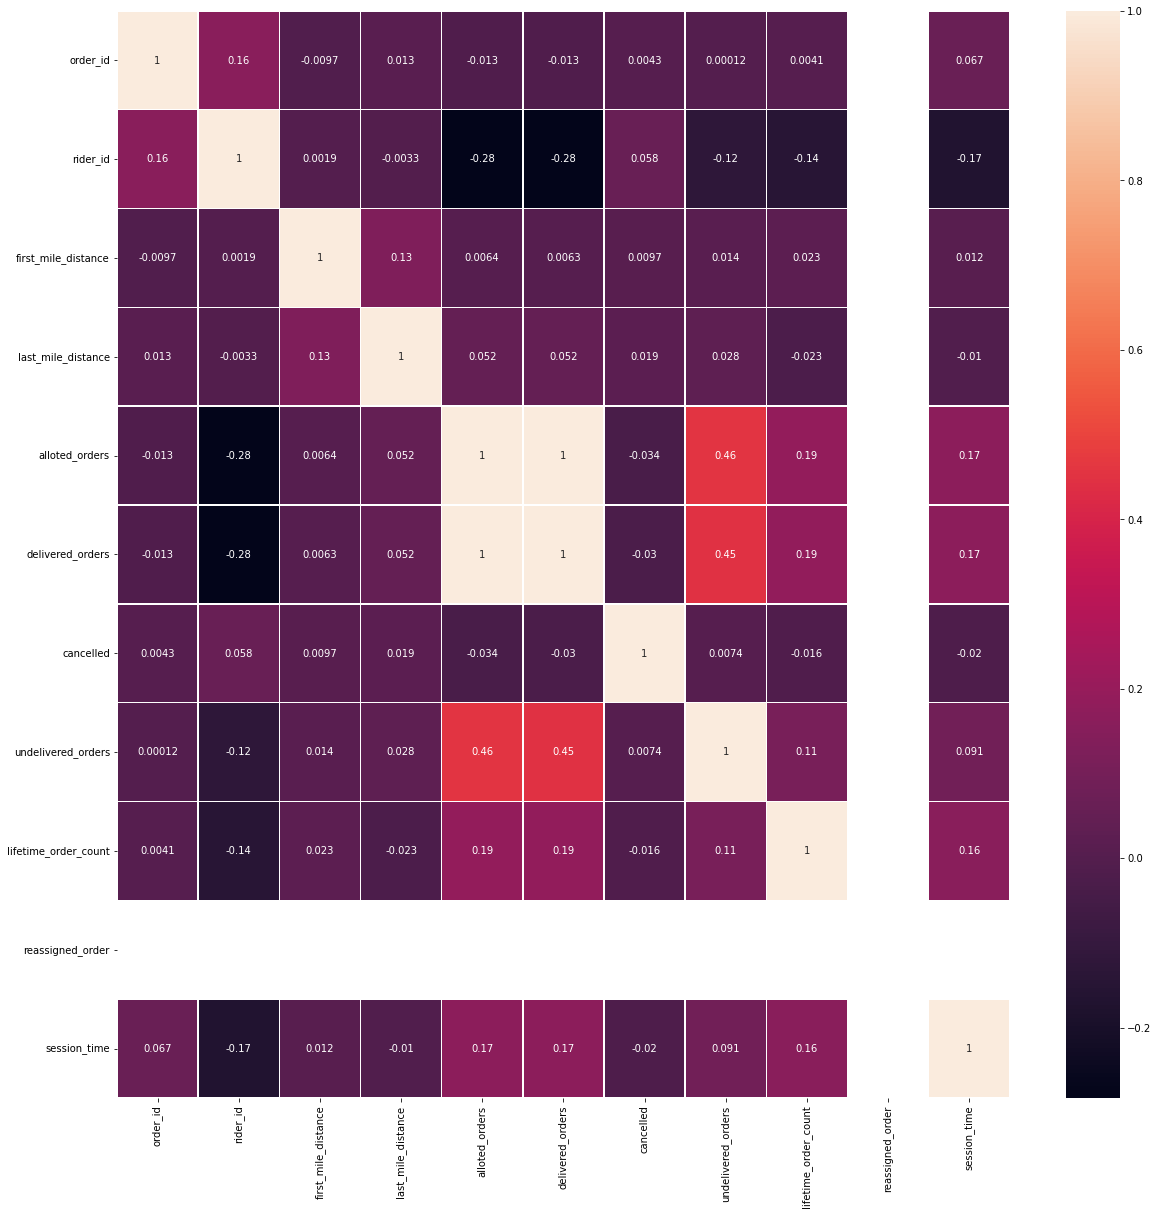

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,20))
ax = sns.heatmap(data.corr().iloc[:,:], annot=True, linewidths=.5)

Dropping columns with too many NaN values,

In [ ]:
cols = ['reassignment_reason', 'reassignment_method', 'reassigned_order']

In [ ]:
data = data.drop(cols,axis=1)

In [ ]:
test = test.drop(cols,axis=1)

In [ ]:
data = data.drop('cancelled_time',axis=1)

In [ ]:
print(set(data.columns) - set(test.columns))

{'pickup_time', 'cancelled', 'delivered_time'}


In [ ]:
data = data.drop('pickup_time',axis=1)
data = data.drop('delivered_time',axis=1)

After dropping,

In [ ]:
data.isna().sum()

order_time                  0
order_id                    0
order_date                  0
allot_time                  0
accept_time               157
rider_id                    0
first_mile_distance         0
last_mile_distance          0
alloted_orders          16948
delivered_orders        17341
cancelled                   0
undelivered_orders      17341
lifetime_order_count       53
session_time             3675
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_time            450000 non-null  object 
 1   order_id              450000 non-null  int64  
 2   order_date            450000 non-null  object 
 3   allot_time            450000 non-null  object 
 4   accept_time           449843 non-null  object 
 5   rider_id              450000 non-null  int64  
 6   first_mile_distance   450000 non-null  float64
 7   last_mile_distance    450000 non-null  float64
 8   alloted_orders        433052 non-null  float64
 9   delivered_orders      432659 non-null  float64
 10  cancelled             450000 non-null  int64  
 11  undelivered_orders    432659 non-null  float64
 12  lifetime_order_count  449947 non-null  float64
 13  session_time          446325 non-null  float64
dtypes: float64(7), int64(3), object(4)
memory usage: 48.

Checking correlation again,

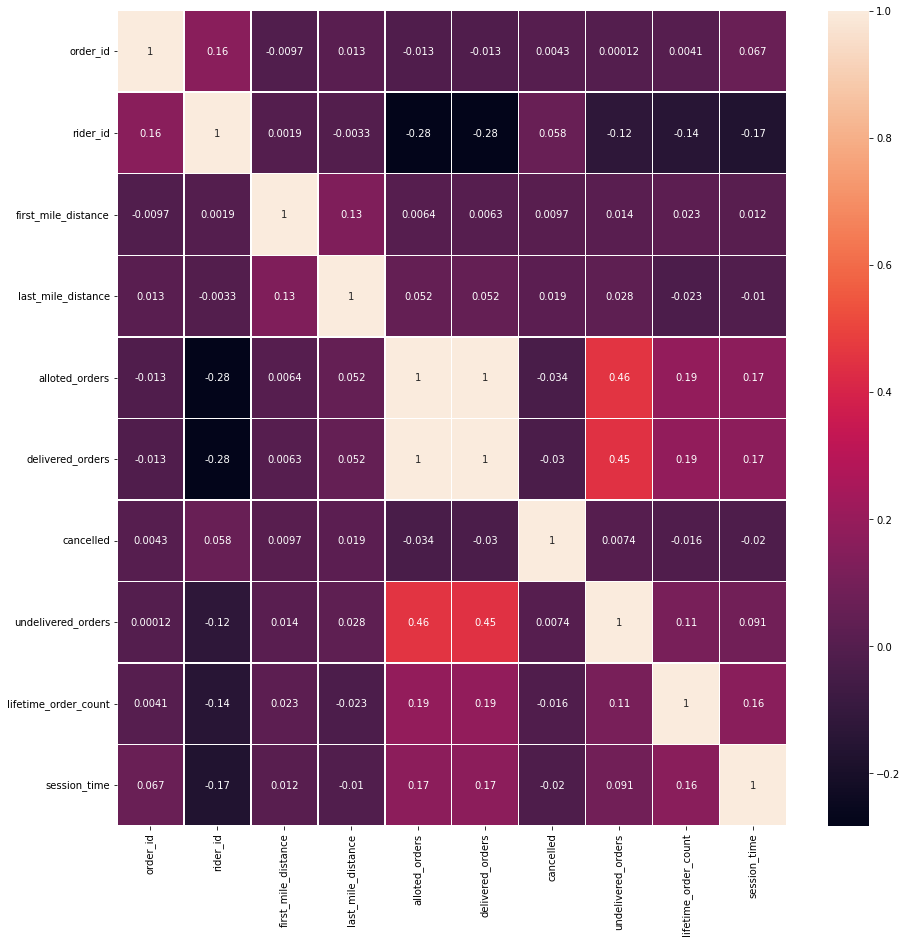

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,15))
ax = sns.heatmap(data.corr().iloc[:,:], annot=True, linewidths=.5)

Dividing the features (for finding missing),

In [ ]:
numerical = ['alloted_orders','delivered_orders','undelivered_orders','lifetime_order_count','session_time']
fdate = ['accept_time']

Since it's difficult to predict time, we drop all rows where accept time is missing,

In [ ]:
# data = data[pd.notnull(data['accept_time'])]

In [ ]:
data.isna().sum()

order_time                  0
order_id                    0
order_date                  0
allot_time                  0
accept_time               157
rider_id                    0
first_mile_distance         0
last_mile_distance          0
alloted_orders          16948
delivered_orders        17341
cancelled                   0
undelivered_orders      17341
lifetime_order_count       53
session_time             3675
dtype: int64

In [ ]:
data.shape

(450000, 14)

In [ ]:
# for rider in test['rider_id']:
#   if rider in v1['rider_id'].values:
#     test1['cancelled'] = list(v1[(v1['rider_id'] == rider)]['cancelled'].values)[0]
#   else:
#     test1['cancelled'] = 0

In [ ]:
data.head(10)

,order_time,order_id,order_date,allot_time,accept_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,session_time
0,2021-01-26 02:21:35,556753,2021-01-26 00:00:00,2021-01-26 02:21:59,2021-01-26 02:22:08,11696,1.566600,2.65,46.0,46.0,0,0.0,621.0,NaN
1,2021-01-26 02:33:16,556754,2021-01-26 00:00:00,2021-01-26 02:33:57,2021-01-26 02:34:45,18117,2.520700,2.76,8.0,8.0,0,0.0,105.0,3.266667
2,2021-01-26 02:39:49,556755,2021-01-26 00:00:00,2021-01-26 02:39:57,2021-01-26 02:40:13,18623,2.207400,4.80,1.0,1.0,0,0.0,66.0,9.816667
3,2021-01-26 02:47:53,556756,2021-01-26 00:00:00,2021-01-26 02:48:25,2021-01-26 02:49:06,15945,2.189400,6.38,1.0,1.0,0,0.0,127.0,17.533333
4,2021-01-26 03:06:30,556757,2021-01-26 00:00:00,2021-01-26 03:07:21,2021-01-26 03:07:57,17589,2.787000,4.01,34.0,34.0,0,0.0,84.0,1.350000
5,2021-01-26 03:07:16,556758,2021-01-26 00:00:00,2021-01-26 03:12:14,2021-01-26 03:12:27,1469,2.481800,5.18,296.0,294.0,0,2.0,1506.0,NaN
6,2021-01-26 03:10:50,556759,2021-01-26 00:00:00,2021-01-26 03:11:18,2021-01-26 03:12:05,8851,2.809100,3.40,45.0,45.0,0,0.0,1460.0,NaN
7,2021-01-26 03:14:10,556760,2021-01-26 00:00:00,2021-01-26 03:14:38,2021-01-26 03:14:44,8493,0.025681,0.16,54.0,53.0,0,1.0,270.0,44.166667
8,2021-01-26 03:14:20,556761,2021-01-26 00:00:00,2021-01-26 03:14:50,2021-01-26 03:15:14,11543,2.444200,2.86,29.0,29.0,0,0.0,955.0,2.500000
9,2021-01-26 03:15:18,556762,2021-01-26 00:00:00,2021-01-26 03:21:27,2021-01-26 03:22:04,21037,2.878600,2.61,NaN,NaN,0,NaN,1.0,NaN


In [ ]:
data['order_time'] = pd.to_datetime(data['order_time'])

In [ ]:
data['order_date'] = pd.to_datetime(data['order_date'])

In [ ]:
data['allot_time'] = pd.to_datetime(data['allot_time'])

In [ ]:
data['accept_time'] = pd.to_datetime(data['accept_time'])

# Guna's Filling,

In [ ]:
# data['session_time'] = data['session_time'].fillna(data.groupby('cancelled')['session_time'].transform('median'))

In [ ]:
# data['lifetime_order_count'] = data['lifetime_order_count'].fillna(data.groupby('rider_id')['lifetime_order_count'].transform('median'))

In [ ]:
# data['lifetime_order_count'].fillna(0, inplace = True)

In [ ]:
# data['delivered_orders'] = data['delivered_orders'].fillna(data.groupby('cancelled')['delivered_orders'].transform('last'))

In [ ]:
# data['alloted_orders'] = data['alloted_orders'].fillna(data.groupby('cancelled')['alloted_orders'].transform('last'))

In [ ]:
# data['undelivered_orders'] = data['undelivered_orders'].fillna(data.groupby('cancelled')['undelivered_orders'].transform('last'))

In [ ]:
data['acc_all_diff'] = data['accept_time'] - data['allot_time']
data['acc_ord_diff'] = data['accept_time'] - data['order_time']

In [ ]:
data['accept_time'].fillna(0, inplace = True)

In [ ]:
data['hour'] = data['order_time'].dt.hour

In [ ]:
data['acc_all_diff'] = data['acc_all_diff']/np.timedelta64(1,'s')
data['acc_ord_diff'] = data['acc_ord_diff']/np.timedelta64(1,'s')

In [ ]:
# data['acc_all_diff'] = data['acc_all_diff'].fillna(data.groupby('rider_id')['acc_all_diff'].transform('median'))
# data['acc_ord_diff'] = data['acc_ord_diff'].fillna(data.groupby('rider_id')['acc_ord_diff'].transform('median'))

In [ ]:
# data['acc_all_diff'] = data['acc_all_diff'].fillna(data.groupby('cancelled')['acc_all_diff'].transform('median'))
# data['acc_ord_diff'] = data['acc_ord_diff'].fillna(data.groupby('cancelled')['acc_ord_diff'].transform('median'))

In [ ]:
b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
data['session'] = pd.cut(data['hour'], bins=b, labels=l, include_lowest=True)

In [ ]:
data.head()

,order_time,order_id,order_date,allot_time,accept_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,session_time,acc_all_diff,acc_ord_diff,hour,session
0,2021-01-26 02:21:35,556753,2021-01-26,2021-01-26 02:21:59,2021-01-26 02:22:08,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,9.0,33.0,2,Late Night
1,2021-01-26 02:33:16,556754,2021-01-26,2021-01-26 02:33:57,2021-01-26 02:34:45,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,3.266667,48.0,89.0,2,Late Night
2,2021-01-26 02:39:49,556755,2021-01-26,2021-01-26 02:39:57,2021-01-26 02:40:13,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,9.816667,16.0,24.0,2,Late Night
3,2021-01-26 02:47:53,556756,2021-01-26,2021-01-26 02:48:25,2021-01-26 02:49:06,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,17.533333,41.0,73.0,2,Late Night
4,2021-01-26 03:06:30,556757,2021-01-26,2021-01-26 03:07:21,2021-01-26 03:07:57,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,1.350000,36.0,87.0,3,Late Night


In [ ]:
data['day_of_week'] = data['order_date'].dt.dayofweek

In [ ]:
cols = list(data.columns)
cols

['order_time',
 'order_id',
 'order_date',
 'allot_time',
 'accept_time',
 'rider_id',
 'first_mile_distance',
 'last_mile_distance',
 'alloted_orders',
 'delivered_orders',
 'cancelled',
 'undelivered_orders',
 'lifetime_order_count',
 'session_time',
 'acc_all_diff',
 'acc_ord_diff',
 'hour',
 'session',
 'day_of_week']

Rearranging columns, removing allot_time, accept_time, and hours

In [ ]:
cols = [ 
 'order_id',
 'acc_all_diff',
 'acc_ord_diff',
 'hour',
 'session',
 'day_of_week',
 'rider_id',
 'first_mile_distance',
 'last_mile_distance',
 'alloted_orders',
 'delivered_orders',
 'undelivered_orders',
 'lifetime_order_count',
 'session_time',
 'cancelled',
]

In [ ]:
data = data[cols]

In [ ]:
data.head(2)

,order_id,acc_all_diff,acc_ord_diff,hour,session,day_of_week,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,session_time,cancelled
0,556753,9.0,33.0,2,Late Night,1,11696,1.5666,2.65,46.0,46.0,0.0,621.0,NaN,0
1,556754,48.0,89.0,2,Late Night,1,18117,2.5207,2.76,8.0,8.0,0.0,105.0,3.266667,0


In [ ]:
data.isna().sum()

order_id                    0
acc_all_diff              157
acc_ord_diff              157
hour                        0
session                     0
day_of_week                 0
rider_id                    0
first_mile_distance         0
last_mile_distance          0
alloted_orders          16948
delivered_orders        17341
undelivered_orders      17341
lifetime_order_count       53
session_time             3675
cancelled                   0
dtype: int64

In [ ]:
data.shape

(450000, 15)

In [ ]:
data['session'],_ = pd.factorize(data['session'])

From the EDA, we see two things
1.   The highest number of cancellations occur on Saturday (or is it just Jan 30?) -  we can have two approaches here; either consider it to be weekend or day basis
2.   Data for the next Saturday ends abruptly at morning 10.00 hours, so should we drop the last day in the dataset?

Trying some visualization techniques,

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

Handling missing values before that,

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
X.shape

(450000, 14)

In [ ]:
LALA.shape

(594844, 14)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
LALA = pd.DataFrame(scaler.fit_transform(LALA), columns = LALA.columns)
LALA.head()

,order_id,acc_all_diff,acc_ord_diff,hour,session,day_of_week,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,session_time
0,0.935968,0.967527,0.002116,0.095238,0.0,0.166667,0.542335,0.028645,0.118251,0.079505,0.080214,0.0,0.020381,NaN
1,0.935970,0.968849,0.005706,0.095238,0.0,0.166667,0.840072,0.046091,0.123159,0.012367,0.012478,0.0,0.003446,0.002515
2,0.935971,0.967764,0.001539,0.095238,0.0,0.166667,0.863535,0.040362,0.214190,0.000000,0.000000,0.0,0.002166,0.007557
3,0.935973,0.968611,0.004680,0.095238,0.0,0.166667,0.739358,0.040033,0.284694,0.000000,0.000000,0.0,0.004168,0.013498
4,0.935975,0.968442,0.005578,0.142857,0.0,0.166667,0.815589,0.050960,0.178938,0.058304,0.058824,0.0,0.002757,0.001039


In [ ]:
imputer = KNNImputer(n_neighbors=5)
LALA = pd.DataFrame(imputer.fit_transform(LALA),columns = LALA.columns)

In [ ]:
LALA.isna().sum()

order_id                0
acc_all_diff            0
acc_ord_diff            0
hour                    0
session                 0
day_of_week             0
rider_id                0
first_mile_distance     0
last_mile_distance      0
alloted_orders          0
delivered_orders        0
undelivered_orders      0
lifetime_order_count    0
session_time            0
dtype: int64

In [ ]:
test1 = LALA.iloc[450000:,:]

In [ ]:
X1 = LALA.iloc[:450000,:]

In [ ]:
# y.head()

0    0
1    0
2    0
3    0
4    0
Name: cancelled, dtype: int64

In [ ]:
X1['cancelled'] = data['cancelled']

In [ ]:
X1.shape

(205522, 15)

In [ ]:
test1.shape

(144844, 14)

In [ ]:
test1['day_of_week'].value_counts()

0.166667    41189
0.000000    39256
1.000000    37905
0.833333    26494
Name: day_of_week, dtype: int64

In [ ]:
X1['day_of_week'].value_counts()

0.666667    83548
0.500000    80468
0.333333    80462
0.166667    78965
0.833333    49470
1.000000    39254
0.000000    37833
Name: day_of_week, dtype: int64

In [ ]:
X1 = X1[(X1['day_of_week'] <0.2) | (X1['day_of_week'] >0.7)]

In [ ]:
X = X1.iloc[:,0:-1]
y = X1.iloc[:,-1]

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: cancelled, dtype: int64

In [ ]:
data1 = data.copy()

In [ ]:
def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

In [ ]:
for feature in numerical:
    data1[feature + '_imp'] = data1[feature]
    data1 = random_imputation(data1, feature)

In [ ]:
from sklearn import linear_model

In [ ]:
# deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

# for feature in missing_columns:
        
#     deter_data["Det" + feature] = df[feature + "_imp"]
#     parameters = list(set(df.columns) - set(missing_columns) - {feature + '_imp'})
    
#     #Create a Linear Regression model to estimate the missing data
#     model = linear_model.LinearRegression()
#     model.fit(X = df[parameters], y = df[feature + '_imp'])
    
#     #observe that I preserve the index of the missing data from the original dataframe
#     deter_data.loc[df[feature].isnull(), "Det" + feature] = model.predict(df[parameters])[df[feature].isnull()]

In [ ]:
random_data = pd.DataFrame(columns = ["Ran" + name for name in numerical])

for feature in numerical:
        
    random_data["Ran" + feature] = data1[feature + '_imp']
    parameters = list(set(data1.columns) - set(numerical) - {feature + '_imp'})
    
    model = linear_model.LinearRegression()
    model.fit(X = data1[parameters], y = data1[feature + '_imp'])
    
    # #Standard Error of the regression estimates is equal to std() of the errors of each estimates
    # predict = model.predict(data1[parameters])
    # std_error = (predict[data1[feature].notnull()] - data1.loc[data1[feature].notnull(), feature + '_imp']).std()
    
    #observe that I preserve the index of the missing data from the original dataframe
    # random_predict = np.random.normal(size = data1[feature].shape[0], 
    #                                   loc = predict, 
    #                                   scale = std_error)
    # random_data.loc[(data1[feature].isnull()) & (random_predict > 0), "Ran" + feature] = random_predict[(data1[feature].isnull()) & 
    #                                                                         (random_predict > 0)]
    random_data.loc[data1[feature].isnull(), "Ran" + feature] = model.predict(data1[parameters])[data1[feature].isnull()]

In [ ]:
random_data.isna().sum()

In [ ]:
random_data.head(2)

In [ ]:
random_data['Ranalotted_orders'] = -1
random_data['Randelivered_orders'] = -1
random_data['Ranundelivered_orders'] = -1
random_data['Ranlifetime_order_count'] = -1
random_data['Ransession_time'] = -1

In [ ]:
random_data['order_id'] = data['order_id']

In [ ]:
# random_data.loc[random_data['Ranacc_all_diff'] < 0, 'Ranacc_all_diff'] = 0

In [ ]:
# data.loc[data.order_id.isin(random_data.order_id), ['lifetime_order_count','alloted_orders','delivered_orders','undelivered_orders','session_time']] = random_data[['Ranlifetime_order_count','Ranalloted_orders','Randelivered_orders','Ranundelivered_orders','Ransession_time']].values

In [ ]:
data.isna().sum()

In [ ]:
# data = data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]

In [ ]:
data['acc_ord_diff'].min()

In [ ]:
data.lifetime_order_count = data.lifetime_order_count.round()
data.delivered_orders = data.delivered_orders.round()
data.undelivered_orders = data.undelivered_orders.round()
data.alloted_orders = data.alloted_orders.round()

In [ ]:
# # New_df is from the random undersample data (fewer instances)
# X = data.drop('cancelled', axis=1)
# y = data['cancelled']

# # PCA Implementation
# t0 = time.time()
# X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
# t1 = time.time()
# print("PCA took {:.2} s".format(t1 - t0))

# # TruncatedSVD
# t0 = time.time()
# X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
# t1 = time.time()
# print("Truncated SVD took {:.2} s".format(t1 - t0))

In [ ]:
# f, (ax2, ax3) = plt.subplots(1, 2, figsize=(24,6))
# # labels = ['No Fraud', 'Fraud']
# f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

# blue_patch = mpatches.Patch(color='#0A0AFF', label='Not Cancelled')
# red_patch = mpatches.Patch(color='#AF0000', label='Cancelled')

# # PCA scatter plot
# ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Not Cancelled', linewidths=2)
# ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Cancelled', linewidths=2)
# ax2.set_title('PCA', fontsize=14)

# ax2.grid(True)

# ax2.legend(handles=[blue_patch, red_patch])

# # TruncatedSVD scatter plot
# ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Not Cancelled', linewidths=2)
# ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Cancelled', linewidths=2)
# ax3.set_title('Truncated SVD', fontsize=14)

# ax3.grid(True)

# ax3.legend(handles=[blue_patch, red_patch])

# plt.show()

**SMOTE BABY**

So far best performance has been,
1.    Borderline SMOTE
2.    ADASYN
3.    SMOTE + TOMEK
4.    SMOTE
5.    SMOTE + ENN

In [ ]:
X.reset_index(drop=True, inplace=True)

In [ ]:
data.head()

In [ ]:
# from sklearn.model_selection import train_test_split 
# from sklearn.metrics import accuracy_score
# from xgboost import XGBClassifier

In [ ]:
from collections import Counter

def detect_outliers(train_data,n,features):
    
    outlier_indices = []
    for col in features:
        upper_limit=X[col].mean()+3.88*X[col].std()
        lower_limit=X[col].mean()-2.88*X[col].std()
        outlier_list_col = train_data[(train_data[col] < lower_limit) | (train_data[col] > upper_limit )].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

list_atributes = X.columns
Outliers_to_drop = detect_outliers(X,2,list_atributes)

In [ ]:
len(Outliers_to_drop)

115

In [ ]:
from collections import Counter

def detect_outliers(train_data,n,features):
    
    outlier_indices = []
    for col in features:
        upper_limit=X[col].mean()+3*X[col].std()
        lower_limit=X[col].mean()-2.5*X[col].std()
        outlier_list_col = train_data[(train_data[col] < lower_limit) | (train_data[col] > upper_limit )].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

list_atributes = X.columns
Outliers_to_drop2 = detect_outliers(X,2,list_atributes)

In [ ]:
tgindex=[]
for i in Outliers_to_drop2:
  if(data.iloc[i]['cancelled']==0):
    tgindex.append(i)

In [ ]:
print(len(tgindex))

794


In [ ]:
finaldrop = list(set(tgindex))

In [ ]:
# finaldrop= list(set(Outliers_to_drop))

In [ ]:
data.shape

In [ ]:
X.drop(X.index[finaldrop], inplace=True)

In [ ]:
y.drop(y.index[finaldrop], inplace=True)

In [ ]:
# X = data.iloc[:,0:-1]
# y = data.iloc[:,-1]

In [ ]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(sampling_strategy='minority', random_state=42)
# X, y = smote.fit_resample(X,y)

In [ ]:
X.shape

# **New**

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale, StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, shuffle = True,stratify=y)

Trying ADASYN,

In [ ]:
# from imblearn.over_sampling import ADASYN
# adasyn = ADASYN(random_state = 101)
# X, y = adasyn.fit_resample(X, y)

In [ ]:
# X.shape

Trying Borderline SMOTE,

In [ ]:
# from imblearn.over_sampling import BorderlineSMOTE
# bsmote = BorderlineSMOTE(random_state = 42, kind = 'borderline-2')
# X, y = bsmote.fit_resample(X, y)

Trying SMOTE + tomek links,

In [ ]:
# from imblearn.combine import SMOTETomek 

# smt = SMOTETomek(random_state=42)
# X, y = smt.fit_resample(X, y)

In [ ]:
# X.shape

In [ ]:
# y.value_counts()

In [ ]:
X_train.isna().sum()

Trying SMOTE + ENN,

In [ ]:
from imblearn.combine import SMOTEENN 

sme = SMOTEENN(random_state=101)
X, y= sme.fit_resample(X, y)

In [ ]:
y.shape

(385440,)

In [ ]:
y.value_counts()

1    201813
0    183627
Name: cancelled, dtype: int64

In [ ]:
from sklearn.ensemble import VotingClassifier,GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import KFold
from sklearn import tree, metrics
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
# models = []
# models.append(('NaiveBayes', GaussianNB()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
# models.append(('RF', RandomForestClassifier()))
# models.append(('GradientBoosting', GradientBoostingClassifier()))
# models.append(('XGB',XGBClassifier()))
# models.append(('LGB',lgb.LGBMClassifier()))
# models.append(("Adaboost",AdaBoostClassifier()))

In [ ]:
X_train.shape

In [ ]:
# from sklearn.ensemble import ExtraTreesClassifier

# TOP_FEATURES = 6

# forest = ExtraTreesClassifier(n_estimators=250, max_depth=5, random_state=1)
# forest.fit(X_train, y_train)

# importances = forest.feature_importances_
# std = np.std(
#     [tree.feature_importances_ for tree in forest.estimators_],
#     axis=0
# )
# indices = np.argsort(importances)[::-1]
# indices = indices[:TOP_FEATURES]

# # importances[indices] = normalize(importances[indices])

# print('Top features:')
# for f in range(TOP_FEATURES):
#     print('%d %f' % (indices[f], importances[indices[f]]))

In [ ]:
# X_train = tX_train
# X_test = tX_test

In [ ]:
# indices = np.append(0, indices)
# fX = X_train.iloc[:, indices]
# X_train = fX

In [ ]:
# fX = X_test.iloc[:, indices]
# X_test = fX

# **ROC AUC CURVE**

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]

Naive Bayes,

In [ ]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train,y_train)

In [ ]:
# predict probabilities
lr_probs = NaiveBayes.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [ ]:
#No Skill
print(ns_auc)

In [ ]:
#My Model
print(lr_auc)

In [ ]:
metrics.plot_confusion_matrix(NaiveBayes,X_test,y_test,values_format = 'd')

LDA,

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [ ]:
LDA = LinearDiscriminantAnalysis()

In [ ]:
LDA.fit(X,y)

LinearDiscriminantAnalysis()

In [ ]:
# predict probabilities
lr_probs = LDA.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [ ]:
#No Skill
print(ns_auc)

In [ ]:
#My Model
print(lr_auc)

In [ ]:
metrics.plot_confusion_matrix(LDA,X_test,y_test,values_format = 'd')

Light GBM,

In [ ]:
import lightgbm as lgb
lgbclf = lgb.LGBMClassifier(random_state=42,objective ='binary')

In [ ]:
lgbclf.fit(X, y)

LGBMClassifier(objective='binary', random_state=42)

In [ ]:
# predict probabilities
lr_probs = lgbclf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [ ]:
#No Skill
print(ns_auc)

In [ ]:
#My Model
print(lr_auc)

In [ ]:
metrics.plot_confusion_matrix(lgbclf,X_test,y_test,values_format = 'd')

Logistic,

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42).fit(X, y)

In [ ]:
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [ ]:
#No Skill
print(ns_auc)

In [ ]:
#My Model
print(lr_auc)

In [ ]:
metrics.plot_confusion_matrix(clf,X_test,y_test,values_format = 'd')

XGBoost,

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(X,y)

XGBClassifier()

In [ ]:
# predict probabilities
lr_probs = xgb.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [ ]:
#No Skill
print(ns_auc)

Voting Classifier,

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
# eclf = VotingClassifier(estimators=[('xgb',xgb),('lgbm', lgbclf), ('log', clf), ('lda',LDA)], voting='soft', weights = [1,1,1.25,1.25]) 73.5

In [ ]:
# eclf = VotingClassifier(estimators=[('lgbm', lgbclf), ('log', clf))], voting='soft', weights = [1,2]) 74

In [ ]:
eclf = VotingClassifier(estimators=[('xgb',xgb),('lgbm', lgbclf), ('log', clf), ('lda',LDA)], voting='soft', weights = [2,2,3,2])

In [ ]:
eclf = VotingClassifier(estimators=[('xgb',xgb),('lgbm', lgbclf), ('log', clf), ('lda',LDA)], voting='soft', weights = [1.25,1.25,1.75,1.75]) 

In [ ]:
eclf.fit(X, y)

VotingClassifier(estimators=[('xgb', XGBClassifier()),
                             ('lgbm',
                              LGBMClassifier(objective='binary',
                                             random_state=42)),
                             ('log', LogisticRegression(random_state=42)),
                             ('lda', LinearDiscriminantAnalysis())],
                 voting='soft', weights=[2, 2, 3, 2])

In [ ]:
y_pred = LDA.predict(test1)

In [ ]:
pd.DataFrame(y_pred).value_counts()

0    123574
1     21270
dtype: int64

In [ ]:
# predict probabilities
lr_probs = eclf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [ ]:
#No Skill
print(ns_auc)

In [ ]:
#My Model
print(lr_auc)

In [ ]:
metrics.plot_confusion_matrix(eclf,X_test,y_test,values_format = 'd')

In [ ]:
#My Model
print(lr_auc)

In [ ]:
metrics.plot_confusion_matrix(xgb,X_test,y_test,values_format = 'd')

KNN,

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knnmodel.fit(X_train,y_train)

In [ ]:
# predict probabilities
lr_probs = knnmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [ ]:
#No Skill
print(ns_auc)

In [ ]:
#My Model
print(lr_auc)

In [ ]:
metrics.plot_confusion_matrix(knnmodel,X_test,y_test,values_format = 'd')

# IDC LOL

In [ ]:
results = []
names = []

for name, model in models:
        
        cv_results = cross_val_score(model, X_train, y_train, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

# **Old (Don't Use Now)**

Retrying Clusters,

In [ ]:
# New_df is from the random undersample data (fewer instances)
# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

In [ ]:
# f, (ax2, ax3) = plt.subplots(1, 2, figsize=(24,6))
# # labels = ['No Fraud', 'Fraud']
# f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

# blue_patch = mpatches.Patch(color='#0A0AFF', label='Not Cancelled')
# red_patch = mpatches.Patch(color='#AF0000', label='Cancelled')

# # PCA scatter plot
# ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Not Cancelled', linewidths=2)
# ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Cancelled', linewidths=2)
# ax2.set_title('PCA', fontsize=14)

# ax2.grid(True)

# ax2.legend(handles=[blue_patch, red_patch])

# # TruncatedSVD scatter plot
# ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Not Cancelled', linewidths=2)
# ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Cancelled', linewidths=2)
# ax3.set_title('Truncated SVD', fontsize=14)

# ax3.grid(True)

# ax3.legend(handles=[blue_patch, red_patch])

# plt.show()

Changing testing data,

In [ ]:
test.isna().sum()

order_time                 0
order_id                   0
order_date                 0
allot_time                 0
accept_time               68
rider_id                   0
first_mile_distance        0
last_mile_distance         0
alloted_orders          4773
delivered_orders        4884
undelivered_orders      4884
lifetime_order_count     778
session_time            5054
dtype: int64

In [ ]:
# test = test[pd.notnull(test['accept_time'])]

In [ ]:
test['order_time'] = pd.to_datetime(test['order_time'])

In [ ]:
test['order_date'] = pd.to_datetime(test['order_date'])

In [ ]:
test['allot_time'] = pd.to_datetime(test['allot_time'])

In [ ]:
test['accept_time'] = pd.to_datetime(test['accept_time'])

In [ ]:
test['acc_all_diff'] = test['accept_time'] - test['allot_time']
test['acc_ord_diff'] = test['accept_time'] - test['order_time']

In [ ]:
test['hour'] = test['order_time'].dt.hour

In [ ]:
test['acc_all_diff'] = test['acc_all_diff']/np.timedelta64(1,'s')
test['acc_ord_diff'] = test['acc_ord_diff']/np.timedelta64(1,'s')

In [ ]:
b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
test['session'] = pd.cut(test['hour'], bins=b, labels=l, include_lowest=True)

In [ ]:
test.head()

,order_time,order_id,order_date,allot_time,accept_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,session_time,acc_all_diff,acc_ord_diff,hour,session
0,2021-02-06 10:03:24,130231,2021-02-06,2021-02-06 10:03:49,2021-02-06 10:04:15,12884,1.6585,4.54,216.0,215.0,1.0,747.0,273.400000,26.0,51.0,10,Morning
1,2021-02-06 10:03:26,130232,2021-02-06,2021-02-06 10:03:27,2021-02-06 10:03:36,3541,2.0709,5.84,52.0,52.0,0.0,75.0,252.100000,9.0,10.0,10,Morning
2,2021-02-06 10:03:27,130233,2021-02-06,2021-02-06 10:04:14,2021-02-06 10:05:34,603,1.3884,0.99,289.0,289.0,0.0,2214.0,241.383333,80.0,127.0,10,Morning
3,2021-02-06 10:03:29,130234,2021-02-06,2021-02-06 10:03:30,2021-02-06 10:03:53,3414,1.9039,2.59,125.0,122.0,3.0,1020.0,291.933333,23.0,24.0,10,Morning
4,2021-02-06 10:03:35,130235,2021-02-06,2021-02-06 10:03:43,2021-02-06 10:04:43,1426,0.8275,0.94,352.0,350.0,2.0,7284.0,247.133333,60.0,68.0,10,Morning


In [ ]:
test['day_of_week'] = test['order_date'].dt.dayofweek

In [ ]:
cols = list(test.columns)
cols

['order_time',
 'order_id',
 'order_date',
 'allot_time',
 'accept_time',
 'rider_id',
 'first_mile_distance',
 'last_mile_distance',
 'alloted_orders',
 'delivered_orders',
 'undelivered_orders',
 'lifetime_order_count',
 'session_time',
 'acc_all_diff',
 'acc_ord_diff',
 'hour',
 'session',
 'day_of_week']

Rearranging columns, removing allot_time, accept_time, and hours

In [ ]:
cols = [ 
 'order_id',
 'acc_all_diff',
 'acc_ord_diff',
 'hour',
 'session',
 'day_of_week',
 'rider_id',
 'first_mile_distance',
 'last_mile_distance',
 'alloted_orders',
 'delivered_orders',
 'undelivered_orders',
 'lifetime_order_count',
 'session_time',
]

In [ ]:
test = test[cols]

In [ ]:
test.head(2)

,order_id,acc_all_diff,acc_ord_diff,hour,session,day_of_week,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,session_time
0,130231,26.0,51.0,10,Morning,5,12884,1.6585,4.54,216.0,215.0,1.0,747.0,273.4
1,130232,9.0,10.0,10,Morning,5,3541,2.0709,5.84,52.0,52.0,0.0,75.0,252.1


In [ ]:
test.isna().sum()

order_time                 0
order_id                   0
order_date                 0
allot_time                 0
accept_time               68
rider_id                   0
first_mile_distance        0
last_mile_distance         0
alloted_orders          4773
delivered_orders        4884
undelivered_orders      4884
lifetime_order_count     778
session_time            5054
acc_all_diff              68
acc_ord_diff              68
hour                       0
session                    0
day_of_week                0
dtype: int64

In [ ]:
test['acc_all_diff'] = test['acc_all_diff'].fillna(0)
test['acc_ord_diff'] = test['acc_ord_diff'].fillna(0)

In [ ]:
test['session'],_ = pd.factorize(test['session'])

# FK YES BBB

In [ ]:
test = test[cols]

In [ ]:
LALA = pd.concat([X, test[cols]],ignore_index=True)

In [ ]:
LALA.head()

,order_id,acc_all_diff,acc_ord_diff,hour,session,day_of_week,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,session_time
0,556753,9.0,33.0,2,0,1,11696,1.5666,2.65,46.0,46.0,0.0,621.0,NaN
1,556754,48.0,89.0,2,0,1,18117,2.5207,2.76,8.0,8.0,0.0,105.0,3.266667
2,556755,16.0,24.0,2,0,1,18623,2.2074,4.80,1.0,1.0,0.0,66.0,9.816667
3,556756,41.0,73.0,2,0,1,15945,2.1894,6.38,1.0,1.0,0.0,127.0,17.533333
4,556757,36.0,87.0,3,0,1,17589,2.7870,4.01,34.0,34.0,0.0,84.0,1.350000


In [ ]:
test2 = test[cols]

In [ ]:
print(set(test.columns)-set(X.columns))

set()


In [ ]:
# test = test.reindex(columns=test.columns)
# X = X.reindex(columns=X.columns)

In [ ]:
test2 = pd.concat([X, test[cols]], ignore_index=True)

In [ ]:
test2.isna().sum()

In [ ]:
cols = ['lifetime_order_count','alloted_orders','delivered_orders','undelivered_orders','session_time']

In [ ]:
def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

In [ ]:
for feature in cols:
    test2[feature + '_imp'] = test2[feature]
    test2 = random_imputation(test2, feature)

In [ ]:
from sklearn import linear_model

In [ ]:
random_test = pd.DataFrame(columns = ["Ran" + name for name in cols])

for feature in cols:
        
    random_test["Ran" + feature] = test2[feature + '_imp']
    parameters = list(set(test2.columns) - set(cols) - {feature + '_imp'})
    
    model = linear_model.LinearRegression()
    model.fit(X = test2[parameters], y = test2[feature + '_imp'])
    
    #Standard Error of the regression estimates is equal to std() of the errors of each estimates
    predict = model.predict(test2[parameters])
    std_error = (predict[test2[feature].notnull()] - test2.loc[test2[feature].notnull(), feature + '_imp']).std()
    
    #observe that I preserve the index of the missing data from the original dataframe
    random_predict = np.random.normal(size = test2[feature].shape[0], 
                                      loc = predict, 
                                      scale = std_error)
    random_test.loc[(test2[feature].isnull()) & (random_predict > 0), "Ran" + feature] = random_predict[(test2[feature].isnull()) & 
                                                                            (random_predict > 0)]

In [ ]:
random_test = random_test.iloc[776395:,:]

In [ ]:
random_test['order_id'] = test['order_id'].values

In [ ]:
random_test.head()

In [ ]:
random_test.isna().sum()

In [ ]:
random_test.shape

In [ ]:
# random_test.loc[random_data['Ranacc_all_diff'] <= 0, 'Ranacc_all_diff'] = 0

In [ ]:
# test.loc[test.order_id.isin(random_test.order_id), ['lifetime_order_count','alloted_orders','delivered_orders','undelivered_orders','session_time']] = random_test[['Ranlifetime_order_count','Ranalloted_orders','Randelivered_orders','Ranundelivered_orders','Ransession_time']].values

# Validation

In [ ]:
data.head()

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
test.shape

In [ ]:
from sklearn.ensemble import VotingClassifier,GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import KFold
from sklearn import tree, metrics
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# models = []
# models.append(('NaiveBayes', GaussianNB()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
# models.append(('RF', RandomForestClassifier()))
# models.append(('GradientBoosting', GradientBoostingClassifier()))
# models.append(('XGB',XGBClassifier()))
# models.append(('LGB',lgb.LGBMClassifier()))
# models.append(("Adaboost",AdaBoostClassifier()))

Will drop extreme outliers (Later),

Standard Scaler,

In [ ]:
X = X.drop('hour',axis=1)
X = X.drop('alloted_orders',axis=1)

test = test.drop('hour',axis=1)
test = test.drop('alloted_orders',axis=1)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,15))
ax = sns.heatmap(X.corr().iloc[:, 0:15:], annot=True, linewidths=.5)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
X.head()

In [ ]:
X = X.drop('order_id',axis=1)
test = test.drop('order_id',axis=1)

In [ ]:
X['dist_diff'] = X['last_mile_distance'] - X['first_mile_distance']

In [ ]:
test['dist_diff'] = test['last_mile_distance'] - test['first_mile_distance']

In [ ]:
# #Data scaling
# std_scaler = StandardScaler()
# std_scaler.fit(X)
# X_train_std = std_scaler.transform(X)
# X_test_std = std_scaler.transform(test)

# # mm_scaler = MinMaxScaler()
# # mm_scaler.fit(X)
# # X_train_mm = mm_scaler.transform(X)
# # X_test_mm = mm_scaler.transform(test)

In [ ]:
# pd.DataFrame(X_train_std).head()

In [ ]:
print(set(X.columns)-set(test.columns))

set()


In [ ]:
# X = pd.DataFrame(X_train_std)
# test = pd.DataFrame(X_test_std)

Feature engineering performed so far,

1.   Session
2.   Hour of the Day
3.   Acc All Diff
4.   Acc Ord Diff

Try to add -> Final - Initial Distance




Logistic,

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42).fit(X, y)

In [ ]:
y_pred = clf.predict(X)

In [ ]:
pd.DataFrame(y_pred).value_counts()

Weighted Logistic,

In [ ]:
# define class weights
w = {0:1.055, 1:1.5217}# define model
lg2 = LogisticRegression(random_state=42, class_weight=w)
# fit it
lg2.fit(X,y)

In [ ]:
y_pred = lg2.predict(test)# performance

In [ ]:
pd.DataFrame(y_pred).value_counts()

LDA,

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [ ]:
LDA = LinearDiscriminantAnalysis()

In [ ]:
LDA.fit(X,y)

In [ ]:
y_pred = LDA.predict(test)

In [ ]:
pd.DataFrame(y_pred).value_counts()

QDA,

In [ ]:
QDA = QuadraticDiscriminantAnalysis()

In [ ]:
QDA.fit(X,y)

In [ ]:
y_pred = QDA.predict(X)

In [ ]:
pd.DataFrame(y_pred).value_counts()

XGBoost,

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(X,y)

In [ ]:
y_pred = xgb.predict(X)

In [ ]:
pd.DataFrame(y_pred).value_counts()

LGBoost,

In [ ]:
w = {0:1.055, 1:1.6716}# define model

In [ ]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(random_state=42,objective ='binary',class_weight=w)

In [ ]:
clf.fit(X, y)

In [ ]:
y_pred = clf.predict(test)

In [ ]:
pd.DataFrame(y_pred).value_counts()

Gaussian NB,

In [ ]:
from sklearn.naive_bayes import GaussianNB
nbmodel = GaussianNB()

In [ ]:
nbmodel.fit(X,y)

In [ ]:
y_pred = nbmodel.predict(test)

In [ ]:
pd.DataFrame(y_pred).value_counts()

KNN,

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knnmodel.fit(X,y)

In [ ]:
y_pred = knnmodel.predict(X)

In [ ]:
pd.DataFrame(y_pred).value_counts()

Everything is shit so far LOL (Try different SMOTE later)

Trying NN,

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [ ]:
hidden_units=100
learning_rate=0.01
hidden_layer_act='tanh'
output_layer_act='sigmoid'
no_epochs=100

In [ ]:
nnmodel = Sequential()

In [ ]:
nnmodel.add(Dense(hidden_units, input_dim=13, activation=hidden_layer_act))
nnmodel.add(Dense(hidden_units, activation=hidden_layer_act))
nnmodel.add(Dense(1, activation=output_layer_act))

In [ ]:
sgd=tf.keras.optimizers.SGD(lr=learning_rate)
nnmodel.compile(loss='binary_crossentropy',optimizer=sgd, metrics=['acc'])

In [ ]:
# nnmodel.fit(X, y, epochs=no_epochs, batch_size=len(X)+1,  verbose=2)

In [ ]:
# y_pred = nnmodel.predict(X)

In [ ]:
# pd.DataFrame(y_pred).value_counts()

In [ ]:
test2=pd.read_csv("/content/drive/MyDrive/test.csv")

In [ ]:
test2

,order_time,order_id,order_date,allot_time,accept_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time
0,2021-02-06 10:03:24,130231,2021-02-06 00:00:00,2021-02-06 10:03:49,2021-02-06 10:04:15,12884,1.658500,4.54,216.0,215.0,1.0,747.0,NaN,NaN,NaN,273.400000
1,2021-02-06 10:03:26,130232,2021-02-06 00:00:00,2021-02-06 10:03:27,2021-02-06 10:03:36,3541,2.070900,5.84,52.0,52.0,0.0,75.0,NaN,NaN,NaN,252.100000
2,2021-02-06 10:03:27,130233,2021-02-06 00:00:00,2021-02-06 10:04:14,2021-02-06 10:05:34,603,1.388400,0.99,289.0,289.0,0.0,2214.0,NaN,NaN,NaN,241.383333
3,2021-02-06 10:03:29,130234,2021-02-06 00:00:00,2021-02-06 10:03:30,2021-02-06 10:03:53,3414,1.903900,2.59,125.0,122.0,3.0,1020.0,NaN,NaN,NaN,291.933333
4,2021-02-06 10:03:35,130235,2021-02-06 00:00:00,2021-02-06 10:03:43,2021-02-06 10:04:43,1426,0.827500,0.94,352.0,350.0,2.0,7284.0,NaN,NaN,NaN,247.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144839,2021-02-09 20:13:39,41184,2021-02-09 00:00:00,2021-02-09 20:13:40,2021-02-09 20:13:49,7141,1.417000,3.96,52.0,52.0,0.0,413.0,NaN,NaN,NaN,179.266667
144840,2021-02-09 20:21:36,41185,2021-02-09 00:00:00,2021-02-09 20:21:59,2021-02-09 20:22:33,8113,0.775600,1.61,95.0,93.0,2.0,284.0,NaN,NaN,NaN,244.400000
144841,2021-02-09 20:24:25,41186,2021-02-09 00:00:00,2021-02-09 20:25:03,2021-02-09 20:26:10,5040,2.049400,1.26,77.0,77.0,0.0,119.0,NaN,NaN,NaN,259.000000
144842,2021-02-09 20:28:07,41187,2021-02-09 00:00:00,2021-02-09 20:28:29,2021-02-09 20:28:53,2946,0.080494,5.50,231.0,228.0,3.0,1759.0,NaN,NaN,NaN,814.283333


In [ ]:
data_final = test2['order_id']

In [ ]:
data_final

0         130231
1         130232
2         130233
3         130234
4         130235
           ...  
144839     41184
144840     41185
144841     41186
144842     41187
144843     41188
Name: order_id, Length: 144844, dtype: int64

In [ ]:
data_final = pd.concat([data_final, pd.DataFrame(y_pred)], axis=1)

In [ ]:
data_final.head()

,order_id,0
0,130231,0
1,130232,0
2,130233,0
3,130234,0
4,130235,0


In [ ]:
data_final.to_csv('LDA.csv')

# **Notes**

Noticed,<br>

Best result so far was around 33k~ give by LDA, followed by Logistic Regression and then LGBM. I haven't experimented much with XGBoost, KNN and Gaussian NB. <br><br>Besides this Neural Networks was difficult to understand (try single layer NN maybe and test with few more layers tho is it extensive for Binary Classfication), and weighted algorithms did not perform very well (though is it for the betterment of AUC_ROC curve because we give more weightage towards weighting and giving 1).<br><br>

Remember the example from TowardsDataScience where the number of 1's present was 1% out of the dataset, and we should consider the split.<br>
https://towardsdatascience.com/weighted-logistic-regression-for-imbalanced-dataset-9a5cd88e68b